In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')

Data Collection and Processing

In [4]:
# loading the data from csv file to pandas dataframe
data = pd.read_csv('car_data.csv')

# 1. Display Top 5 Rows Of The Dataset

In [5]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# 2. Display Last 5 Rows Of The Dataset


In [10]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


# 3. Find Shape of our Dataset (no. of Rows and No. of Columns)

In [11]:
data.shape

(301, 9)

In [13]:
print("Number of Rows-", data.shape[0])
print("Number of Columns-", data.shape[1])

Number of Rows- 301
Number of Columns- 9


# 4. Get Informtaion About our Dataset

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# 5. Check Null Value In the Dataset 

In [16]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# 6. Get Overall Statistics About The Dataset 

In [17]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# 7. Data Preprocessing 

In [18]:
data.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [19]:
import datetime 

In [20]:
date_time = datetime.datetime.now()

In [21]:
data['Age'] = date_time.year - data['Year']

In [22]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [23]:
data.drop('Year',axis=1,inplace=True)

In [24]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


# 8. Outlier Removal 

C:\Users\Sandeep Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

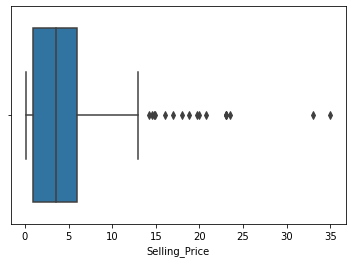

In [26]:
sns.boxplot(data['Selling_Price'])

In [27]:
sorted(data['Selling_Price'],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [29]:
data[(data['Selling_Price']>= 33.0) &  (data['Selling_Price']<= 35.0)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,6
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,13


In [30]:
data[~(data['Selling_Price']>= 33.0) &  (data['Selling_Price']<= 35.0)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [31]:
data = data[~(data['Selling_Price']>= 33.0) &  (data['Selling_Price']<= 35.0)]

In [32]:
data.shape

(299, 9)

# 9. Encoding The Categorical Columns 

In [33]:
data.head(1)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9


In [34]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [35]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [36]:
data['Fuel_Type'].unique()

array([0, 1, 2], dtype=int64)

In [37]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [38]:
data['Seller_Type'] = data['Seller_Type'] .map({'Dealer':0, 'Individual':1})

In [39]:
data['Seller_Type'].unique()

array([0, 1], dtype=int64)

In [41]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [42]:
data['Transmission'] = data['Transmission'] .map({'Manual':0, 'Automatic':1})

In [43]:
data['Transmission'].unique()

array([0, 1], dtype=int64)

# 10. Store Feature Matrix in X and Response (Target) in Vector Y 

In [44]:
x = data.drop(['Car_Name','Selling_Price'], axis=1)
y = data['Selling_Price']

In [47]:
x

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,0,0,0,0,9
1,9.54,43000,1,0,0,0,10
2,9.85,6900,0,0,0,0,6
3,4.15,5200,0,0,0,0,12
4,6.87,42450,1,0,0,0,9
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,0,0,7
297,5.90,60000,0,0,0,0,8
298,11.00,87934,0,0,0,0,14
299,12.50,9000,1,0,0,0,6


In [48]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

# 11. Splitting The Dataset Into The Training Set and Test Set 

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

# 12. Import The Model 

In [50]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,9
1,sx4,4.75,9.54,43000,1,0,0,0,10
2,ciaz,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2.85,4.15,5200,0,0,0,0,12
4,swift,4.60,6.87,42450,1,0,0,0,9


In [56]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 13. Model Training 

In [59]:
lr = LinearRegression()
lr.fit(x_train,y_train)

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

xgb = GradientBoostingRegressor()
xgb.fit(x_train,y_train)

xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# 14. Prediction on Test Data 

In [60]:
y_pred1 = lr.predict(x_test)
y_pred2 = rf.predict(x_test)
y_pred3 = xgb.predict(x_test)
y_pred4 = xg.predict(x_test)

# 15. Evaluating The Algorithm

In [61]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [62]:
print(score1,score2,score3,score4)

0.6790884983129407 0.7434154323576148 0.8847631909028988 0.8864839405756888


In [63]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
                          "R2_SCORE":[score1,score2,score3,score4]})

In [64]:
final_data

,Models,R2_SCORE
0,LR,0.679088
1,RF,0.743415
2,GBR,0.884763
3,XG,0.886484


C:\Users\Sandeep Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='R2_SCORE'>

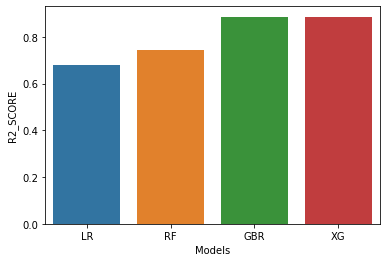

In [65]:
sns.barplot(final_data['Models'], final_data['R2_SCORE'])

# 16. Save The Model 

In [67]:
xg = XGBRegressor()
xg_final = xg.fit(x,y)

In [68]:
import joblib

In [70]:
joblib.dump(xg_final, 'car_price_predictor')

['car_price_predictor']

In [71]:
model = joblib.load('car_price_predictor')

# Again Model Training 

In [97]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
Y = data['Selling_Price']

print(X)
print(Y)

     Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner  \
0             5.59       27000          0            0             0      0   
1             9.54       43000          1            0             0      0   
2             9.85        6900          0            0             0      0   
3             4.15        5200          0            0             0      0   
4             6.87       42450          1            0             0      0   
..             ...         ...        ...          ...           ...    ...   
296          11.60       33988          1            0             0      0   
297           5.90       60000          0            0             0      0   
298          11.00       87934          0            0             0      0   
299          12.50        9000          1            0             0      0   
300           5.90        5464          0            0             0      0   

     Age  
0      9  
1     10  
2      6  
3     1

In [98]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X, Y)

ExtraTreesRegressor()

In [99]:
print(model.feature_importances_)


[0.48617088 0.0344806  0.08840739 0.22822873 0.04586864 0.00119936
 0.11564439]


In [100]:
X.columns


Index(['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'Age'],
      dtype='object')

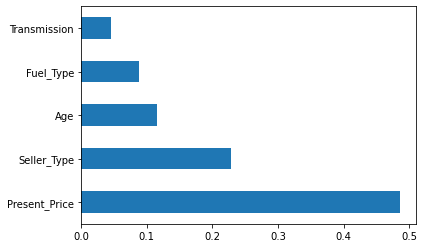

In [101]:
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(5).plot(kind="barh")
plt.show()

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 5)


In [103]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)


(209, 7)
(90, 7)
(209,)


#  1 Random Forest Regressor

In [108]:
import numpy as np


Random Forest Regressor is an ensemble learning algorithm that builds multiple decision trees and combines their predictions to make accurate regression predictions. It's suitable for tasks that require high accuracy and can handle large datasets.

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()


In [104]:
## Train the model
rf_random.fit(X_train, Y_train)

RandomForestRegressor()

# Model Evaluation

In [105]:
## Prediction on Training data
training_data_prediction1 = rf_random.predict(X_train)

In [109]:
## Mean and R squared Errors 

print("MAE : ", metrics.mean_absolute_error(Y_train, training_data_prediction1))
print("MSE : ", metrics.mean_squared_error(Y_train, training_data_prediction1))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction1)))
print("R squared Error : ", metrics.r2_score(Y_train, training_data_prediction1))

MAE :  0.22242535885167447
MSE :  0.17251154751196152
RMSE :  0.4153450944840465
R squared Error :  0.9923065365973573


 # Visualize the actual prices and Predicted prices

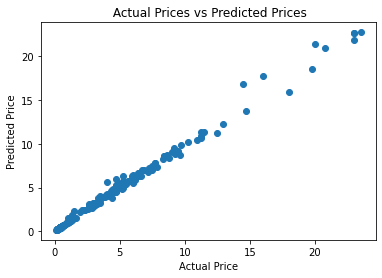

In [111]:
plt.scatter(Y_train, training_data_prediction1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()




In [112]:
## prediction on Test data
test_data_prediction1 = rf_random.predict(X_test)


In [113]:
## Mean and R squared Errors

print("MAE : ", metrics.mean_absolute_error(Y_test, test_data_prediction1))
print("MSE : ", metrics.mean_squared_error(Y_test, test_data_prediction1))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction1)))
print("R squared Error : ", metrics.r2_score(Y_test, test_data_prediction1))


MAE :  0.7203855555555551
MSE :  2.0310046692222197
RMSE :  1.4251332110445745
R squared Error :  0.8624112416764884


# Visualize the actual prices and Predicted prices

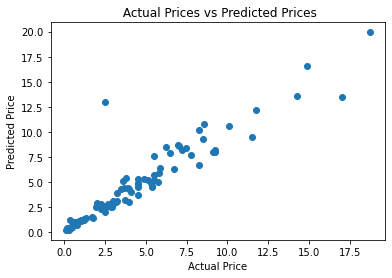

In [114]:
plt.scatter(Y_test, test_data_prediction1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


#  2. Gradient Boosting Regressor


Gradient Boosting Regressor is an ensemble learning algorithm that builds a sequence of weak models, learning from the mistakes of previous models. It's suitable for ML tasks requiring high accuracy and can handle complex relationships and large datasets.

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()


In [117]:
## Train the model
gb.fit(X_train, Y_train)


GradientBoostingRegressor()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

Model Evaluation 

In [119]:
## Prediction on Training data
training_data_prediction2 = gb.predict(X_train)

In [120]:
## Mean and R squared Errors 

print("MAE : ", metrics.mean_absolute_error(Y_train, training_data_prediction2))
print("MSE : ", metrics.mean_squared_error(Y_train, training_data_prediction2))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction2)))
print("R squared Error : ", metrics.r2_score(Y_train, training_data_prediction2))


MAE :  0.18390589812015407
MSE :  0.06725716922148123
RMSE :  0.25933987202410896
R squared Error :  0.997000545311699


# Visualize the actual prices and Predicted prices

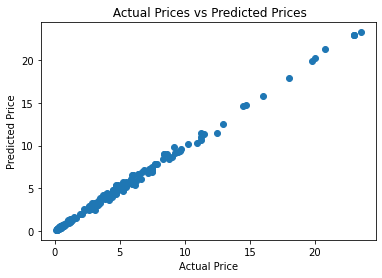

In [123]:
plt.scatter(Y_train, training_data_prediction2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [124]:
## prediction on Test data
test_data_prediction2 = gb.predict(X_test)


In [125]:
## Mean and R squared Errors

print("MAE : ", metrics.mean_absolute_error(Y_test, test_data_prediction2))
print("MSE : ", metrics.mean_squared_error(Y_test, test_data_prediction2))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction2)))
print("R squared Error : ", metrics.r2_score(Y_test, test_data_prediction2))


MAE :  0.6903161998091333
MSE :  1.5564642438866005
RMSE :  1.2475833614979805
R squared Error :  0.8945585965721532


 Visualize the actual prices and Predicted prices

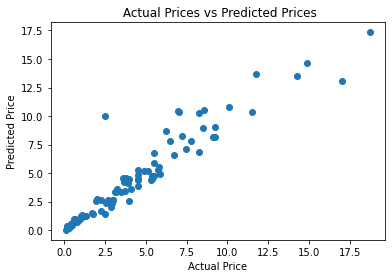

In [126]:
plt.scatter(Y_test, test_data_prediction2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


In [127]:
# Evaluating the Algorithms

In [128]:
score1 = metrics.r2_score(Y_test, test_data_prediction1)
score2 = metrics.r2_score(Y_test, test_data_prediction2)

print(score1, score2)

0.8624112416764884 0.8945585965721532


In [129]:
final_data = pd.DataFrame({'Models':['Random Forest Regressor', 'Gradient Boosting Regressor'], 
                           'R2_Score': [score1, score2]})

final_data


,Models,R2_Score
0,Random Forest Regressor,0.862411
1,Gradient Boosting Regressor,0.894559


C:\Users\Sandeep Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


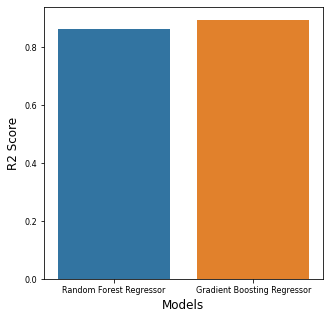

In [130]:
## Visualize the scores on barplot

plt.figure(figsize = (5, 5))
sns.barplot(final_data['Models'],final_data['R2_Score'])

# Set the axis labels and title
plt.xlabel('Models', fontsize= 12)
plt.ylabel('R2 Score', fontsize= 12)
plt.xticks(fontsize= 8)
plt.yticks(fontsize= 8)
plt.show()

# Here both algorithms are having almost the same score and both can be used for the model. If want a best fit then we will go with Random Forest Regressor.

                                      * Thanks. *